<a href="https://colab.research.google.com/github/aluqbnle/ml-sandbox/blob/master/05__MultilayerPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.000
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single pti ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf
bogomips	: 4400.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power ma

In [0]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         359G   20G  321G   6% /
tmpfs           6.4G     0  6.4G   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
/dev/sda1       365G   25G  341G   7% /opt/bin
tmpfs           6.4G  8.0K  6.4G   1% /var/colab
shm             6.0G     0  6.0G   0% /dev/shm
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [2]:
import tensorflow as tf
import timeit

# See https://www.tensorflow.org/tutorials/using_gpu#allowing_gpu_memory_growth
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

with tf.device('/cpu:0'):
  random_image_cpu = tf.random_normal((100, 100, 100, 3))
  net_cpu = tf.layers.conv2d(random_image_cpu, 32, 7)
  net_cpu = tf.reduce_sum(net_cpu)

with tf.device('/gpu:0'):
  random_image_gpu = tf.random_normal((100, 100, 100, 3))
  net_gpu = tf.layers.conv2d(random_image_gpu, 32, 7)
  net_gpu = tf.reduce_sum(net_gpu)

sess = tf.Session(config=config)

# Test execution once to detect errors early.
try:
  sess.run(tf.global_variables_initializer())
except tf.errors.InvalidArgumentError:
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise

def cpu():
  sess.run(net_cpu)

def gpu():
  sess.run(net_gpu)

# Runs the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

sess.close()

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
8.697936216000016
GPU (s):
1.9091362859999208
GPU speedup over CPU: 4x


In [1]:
!pip install japanize-matplotlib

    100% |████████████████████████████████| 4.1MB 1.2MB/s 
  Running setup.py bdist_wheel for japanize-matplotlib ... - \ done
  Stored in directory: /root/.cache/pip/wheels/47/d1/ba/1a686af7cc042edde2c2f4cb18bd981f7eefdcbfe688590d25
Successfully built japanize-matplotlib


In [0]:
import japanize_matplotlib

ここより上はML関係ないです

In [0]:
from pandas import DataFrame
from sklearn.datasets import load_breast_cancer

In [0]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data[:, :10]
y = breast_cancer.target

columns = ['半径', 'テクスチャ', '周囲の長さ', '面積', 'なめらかさ', 'コンパクト性', 'へこみ', 'へこみの数', '対称性', 'フラクタル次元']

df = DataFrame(data=X[:, :10], columns=columns)
df['目的変数'] = y

In [0]:
X=df[['面積','へこみ']].values
y=df['目的変数'].values

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [0]:
from sklearn.preprocessing import StandardScaler

In [56]:
# StandardScalerのインスタンスを作成する
sc = StandardScaler()
#訓練データの平均と標準偏差を計算する
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
# 訓練データの標準化
X_train_std =sc.transform(X_train)

# テストデータの標準化
# テストデータは訓練データの平均と標準偏差を用いて変換する
X_test_std =sc.transform(X_test)

In [0]:
from sklearn.neural_network import MLPClassifier

In [0]:
mlp = MLPClassifier(hidden_layer_sizes=(6, 2), solver='sgd', learning_rate_init=0.01, alpha=0.0001, max_iter=1000, random_state=42)

In [73]:
mlp.fit(X_train_std, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(6, 2), learning_rate='constant',
       learning_rate_init=0.01, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [74]:
#テストデータの予測
pred = mlp.predict(X_test_std)
#予測の確認
print(pred)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0
 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0]


In [0]:
# 確率 (パーセプトロンは取得できない)
proba = mlp.predict_proba(X_test_std)

In [76]:
proba[0]

array([0.13981659, 0.86018341])

In [0]:
from sklearn.metrics import accuracy_score

In [78]:
accuracy_score(y_test,pred)

0.9298245614035088

In [0]:
import numpy
from matplotlib import pyplot
#pyplot.rcParams['font.family'] = 'IPAPGothic'
from mlxtend.plotting import plot_decision_regions
import japanize_matplotlib

In [0]:
# すべてのデータをプロットするとデータが多すぎるので制限する
N = 100

# 訓練データとテストデータからN個ずつのサンプルを先頭から取ってくる
sampled_X = numpy.vstack((X_train_std[:N], X_test_std[:N]))
sampled_y = numpy.hstack((y_train[:N], y_test[:N]))

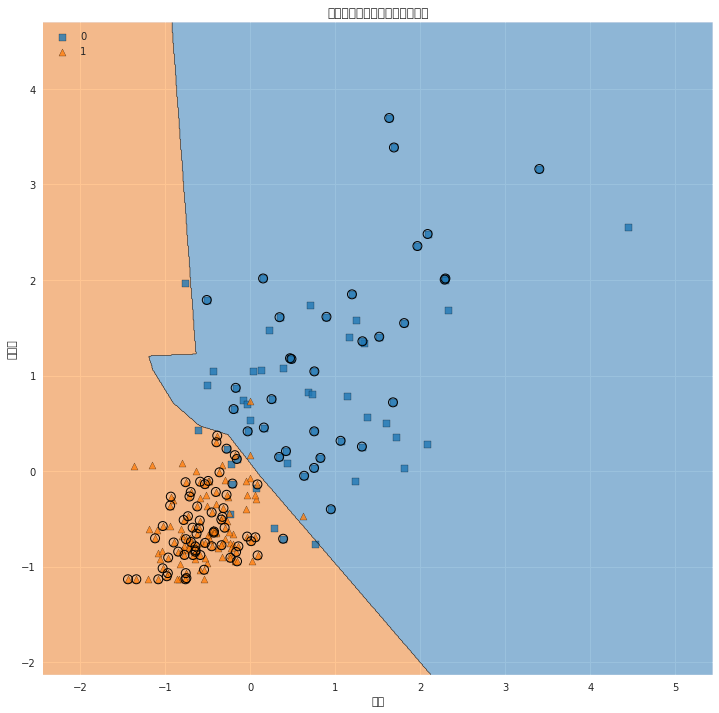

In [48]:
pyplot.figure(figsize=(12, 12))
pyplot.xlabel("面積")
pyplot.ylabel("へこみ")
pyplot.title("多層パーセプトロンの決定領域")

# 決定領域のプロット
plot_decision_regions(sampled_X, sampled_y, clf=mlp, legend=2,  X_highlight=X_test_std[:N])